# YouTube Data Analysis Project (Exploratory Data Analysis of Popular Medical School Information Channels)

## 1.1 Introduction
This project focuses on the analysis of YouTube channels, particularly those providing medical school information. This includes YouTube channels that provide admissions advice to premed students looking to apply to medical school as well as channels that provide study and time management tips to current medical students. Data is taken from the YouTube API v3 [1].

This project was inspired by a similiar analysis of data science YouTube channels. [2]. The original project, which includes a comprehensive walk-through and a GitHub repository with starter code, servers as a foundational model for undertaking this analysis [3]. For those interested, the original YouTube tutorial can be viewed [here](https://youtu.be/D56_Cx36oGY), and the accompanying GitHub repository can be accessed [here](https://github.com/thu-vu92/youtube-api-analysis).

By leveraging data obtained through the YouTube API v3, this analysis aims to uncover insights into video engagement, viewer preferences, and content effectiveness among med school info channels. The insights gained could help content creators optimize their video strategies to better meet the needs of their audience.

## 1.2 Aims and Objectives
**Aims:**
- To analyze trends and patterns in viewer engagement across different med school information channels on YouTube.
- To explore which factors contribute to YouTube video success using data-driven insights.

**Objectives:**
- To get acquainted with the YouTube API and learn how to efficiently obtain video data specific to med school information channels.
- To collect and aggregate data on video views, likes, comments, and other metrics.
- To analyze video data to verify common beliefs about YouTube video performance, including:
  - The impact of likes and comments on video views.
  - The effect of video duration on views and viewer interaction.
  - The influence of title length and the number of tags on video views.
- To identify which types of content garner the most viewer engagement and explore how often creators upload new videos, including analysis of the days of the week that feature new content.
- To explore trending topics using NLP techniques, such as generating word clouds from video titles.

These objectives will guide the analysis, helping to not only understand the specific dynamics of med school information channels but also to draw broader conclusions about effective YouTube content strategies.

## 1.3 Steps of the Project
The project will be carried out in the following steps:
1. **Data Collection**: Utilize the YouTube Data API v3 to fetch data related to med school information channels.
2. **Data Cleaning and Preparation**: Clean the data to ensure accuracy and readiness for analysis, handling any inconsistencies or missing data.
3. **Exploratory Data Analysis (EDA)**: Conduct initial analyses to understand the basic properties and statistics of the data.
4. **Conclusions**: Draw conclusions from the data analysis and provide actionable recommendations for content creators.

## 1.4 Dataset
The dataset will consist of information extracted from the [Google YouTube Data API version 3.0](https://developers.google.com/youtube/v3), including:
- Channel IDs, titles, and descriptions
- Video titles, descriptions, upload dates, and statistics (views, likes, dislikes, comments)
- Subscriber data over time for each channel

This dataset will be continually updated and refined throughout the project as new data becomes available and additional analyses are deemed necessary.

## 1.5 Notes
All custom functions referenced are defined in the `utils.py` module. This module contains utility functions that support data fetching, processing, and analysis tasks for our projects.

In [230]:
# Standard scientific Python imports
import numpy as np
import pandas as pd
from dateutil import parser
import isodate

# Environment variables management
from dotenv import load_dotenv
import os

# Data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="darkgrid", color_codes=True)

# Utility functions from local file
import utils

# Google API
from googleapiclient.discovery import build

In [231]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud

# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Collecting Data with YouTube API

### Get Channel IDs
Before we can begin fetching information from the relevant channels, we first need to retrieve their respective channel IDs. This is because the API uses the channel ID, not the channel name, as an argument to gather data for that channel. We can retrieve these IDs using the `get_channel_id_by_name` function.

In [232]:
# Load api key
load_dotenv()
api_key = os.getenv("YOUTUBE_API_KEY")

# Initializes the Youtube Data API Client  
youtube = build('youtube','v3', developerKey=api_key)

In [233]:
# Get the channel IDs of the channels we are interested in
channel_names = ['Med School Insiders', 'Shemmassian Academic Consulting', 'Medical School HQ', 
                 'TheMDJourney', 'Doctor Kenji', 'DocOssareh',
                 'TheStriveToFit', 'MedBros', 'Kharma Medic']
channel_ids = []
for channel in channel_names:
    channel_id, channel_title = utils.get_channel_id_by_name(youtube, channel)
    channel_ids.append(channel_id)
    print(f"Channel Title: {channel_title}, Channel ID: {channel_id}")

Channel Title: Med School Insiders, Channel ID: UC3VWbWk8qDBiF0741izgpQg
Channel Title: Shemmassian Academic Consulting, Channel ID: UCx7l7GusEB1xMDPGM_TYHeQ
Channel Title: Medical School HQ, Channel ID: UCJlELUnbG72fzxcHEWZqiHQ
Channel Title: TheMDJourney, Channel ID: UCeJWTVANVcjUX2BkV3IJtqA
Channel Title: Doctor Kenji, Channel ID: UC9Pg0ozfydafsPLJBck3lAg
Channel Title: DocOssareh, Channel ID: UCug9OmmsIBW3Z3UqM8kVmeQ
Channel Title: TheStriveToFit, Channel ID: UCqpdayJIwI_yts1uITarNOw
Channel Title: MedBros, Channel ID: UCeaZx7YE9eMv-wLWVhVKLFQ
Channel Title: Kharma Medic, Channel ID: UCeoU2maQX8JiQ9DTuhOVz5g


### Get Channel Statistics
Now that we have retreived the channel IDs of each channel of interest, we can use these IDs to pull furthur data from the API using the `get_channel_stats` function. Specifically, we will pull data like total number of subscribers, views, and videos uploaded.

In [234]:
channel_stats = utils.get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,TheStriveToFit,396000,30937812,243,UUqpdayJIwI_yts1uITarNOw
1,Med School Insiders,1720000,117469544,363,UU3VWbWk8qDBiF0741izgpQg
2,Kharma Medic,1160000,94490822,276,UUeoU2maQX8JiQ9DTuhOVz5g
3,TheMDJourney,61000,4325573,737,UUeJWTVANVcjUX2BkV3IJtqA
4,Medical School HQ,63100,9009483,796,UUJlELUnbG72fzxcHEWZqiHQ
5,MedBros,85800,8004171,162,UUeaZx7YE9eMv-wLWVhVKLFQ
6,Doctor Kenji,57900,3881193,223,UU9Pg0ozfydafsPLJBck3lAg
7,Shemmassian Academic Consulting,35000,2894048,279,UUx7l7GusEB1xMDPGM_TYHeQ
8,DocOssareh,109000,7023572,137,UUug9OmmsIBW3Z3UqM8kVmeQ


In [235]:
channel_stats.dtypes

channelName    object
subscribers    object
views          object
totalVideos    object
playlistId     object
dtype: object

Let's convert the columns subscribers, views, and totalVideos to int so that we can visualize and do numeric operations on them

In [236]:
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_stats[numeric_cols] = channel_stats[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
channel_stats.dtypes

channelName    object
subscribers     int64
views           int64
totalVideos     int64
playlistId     object
dtype: object

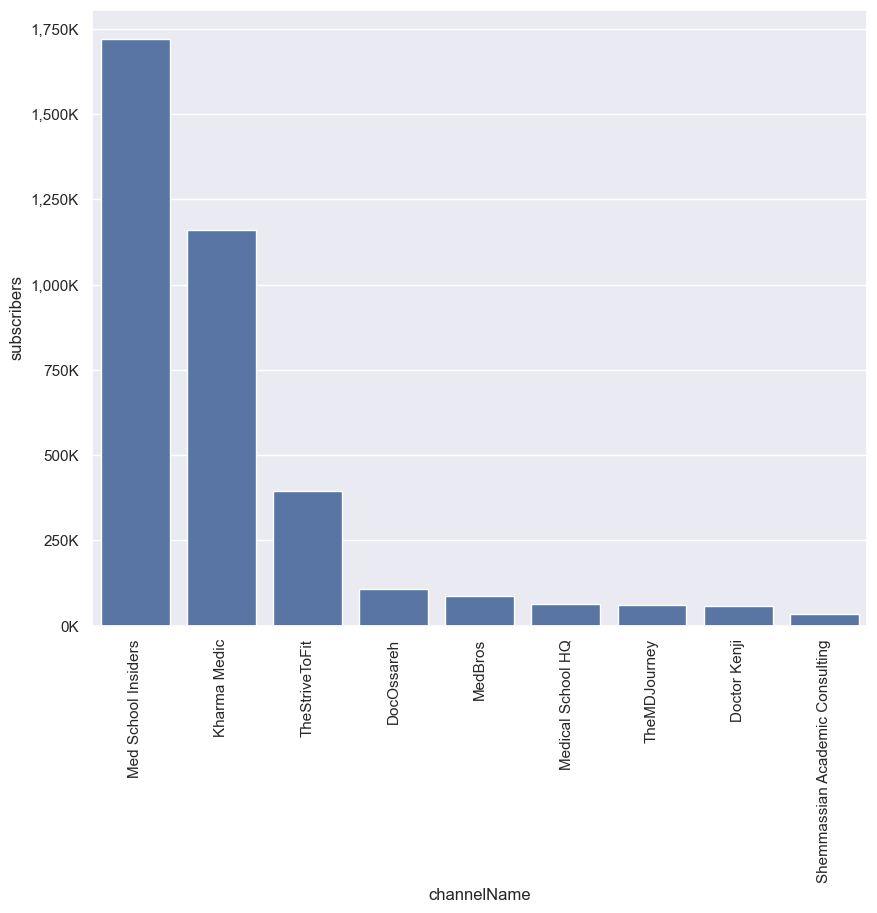

In [237]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelName', y='subscribers', data=channel_stats.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

We can also look at the rank of the number of views across all channels. The top three most subscribed channels seem to be the same as the top three most viewed channels: Med School Insiders, Kharma Medic, and TheStriveToFit. However, even though some channels have more subscribers than others, they have less views. For example, DocOssareh has more subscribers than MedBros, but it has less views.

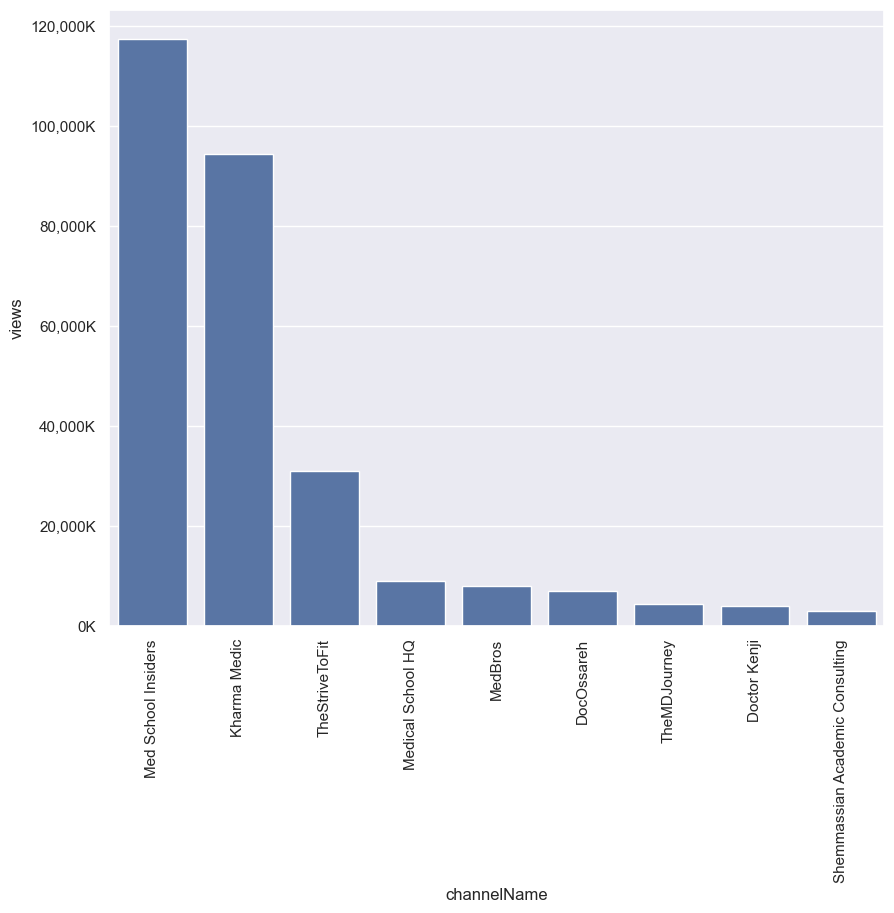

In [238]:
ax = sns.barplot(x='channelName', y='views', data=channel_stats.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### Get Video Statistics

Now that we have explored the channel IDs, let's look at video IDs

In [239]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()

for c in channel_stats['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_stats.loc[channel_stats['channelName']== c, 'playlistId'].iloc[0]
    video_ids = utils.get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = utils.get_video_details(youtube, video_ids)

    # append video data together (so we have one dataframe containing all channels)
    video_df = pd.concat([video_df, video_data], ignore_index=True)

Getting video information from channel: TheStriveToFit
Getting video information from channel: Med School Insiders
Getting video information from channel: Kharma Medic
Getting video information from channel: TheMDJourney
Getting video information from channel: Medical School HQ
Getting video information from channel: MedBros
Getting video information from channel: Doctor Kenji
Getting video information from channel: Shemmassian Academic Consulting
Getting video information from channel: DocOssareh


In [240]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,obGLSu1Y-kc,TheStriveToFit,A Day in the Life as a Doctor + Mom!,Check out Peloton's holiday offers now:\nhttps...,"[doctor, life of a doctor, a day in a life of ...",2023-11-21T14:00:37Z,14638,496,0,23,PT9M59S,hd,true
1,E1IHfnhWtis,TheStriveToFit,balancing my life as an ER Doctor + MBA Studen...,Thanks to Peloton for sponsoring today's video...,"[doctor, life of a doctor, a day in a life of ...",2023-11-02T22:00:12Z,15394,663,0,26,PT8M34S,hd,false
2,vsYbJKm18ow,TheStriveToFit,this is it… taking my last exam EVER 🤞 & inte...,Thanks to Vivian for sponsoring this video! If...,"[doctor, life of a doctor, a day in a life of ...",2023-10-01T04:45:03Z,14319,586,0,30,PT13M45S,hd,false
3,HlJdx61G8-U,TheStriveToFit,wish me luck... i hope i don't fail!,ABOUT ME:\nI’m Jamie. I’m an emergency medicin...,"[doctor, life of a doctor, a day in a life of ...",2023-09-16T19:33:46Z,16642,619,0,51,PT12M49S,hd,false
4,VssVceK1bx0,TheStriveToFit,What's in my bag! ER Doctor #whatsinmybag #doc...,ABOUT ME:\nI’m Jamie. I’m an emergency medicin...,"[doctor, life of a doctor, a day in a life of ...",2023-09-11T22:30:04Z,9840,327,0,2,PT9S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,E1VKEBJMS8Q,DocOssareh,Outliers by Malcom Gladwell - Book Review,In this video we review the book = Outliers by...,"[Book, Review, Outliers, by, Malcom, Gladwell,...",2012-04-22T18:33:45Z,2868,40,0,4,PT4M51S,sd,false
3215,7ZDaE0PkvVg,DocOssareh,Becoming A College Science Major and Entering ...,In this video we discuss Becoming A College Sc...,"[Becoming, College, Science, Major, and, Enter...",2012-04-22T18:33:03Z,5039,107,0,8,PT8M53S,sd,false
3216,7Cc7onxgDCU,DocOssareh,Anatomy In Medical School is Awesome!,In this video we discuss why studying anatomy ...,"[Starting, anatomy, in, medical, school, it's,...",2012-04-22T18:30:28Z,4138,68,0,7,PT10M13S,sd,false
3217,_YO8MGqFWGc,DocOssareh,The Benefits of Fountain Pens,In this video we discuss my opinions regarding...,"[fountain, pens, fountain pens, study, docossa...",2012-04-22T18:05:29Z,40660,438,0,75,PT11M3S,sd,false


# Preprocess Data & Engineer Features

To effectively analyze the data, several preprocessing tasks are necessary. I plan to enhance the data by adding new features that could help elucidate the characteristics of the videos. Additionally, certain columns, particularly those related to date and time like "publishedAt" and "duration," need to be reformatted.

### Check for empty values

In [241]:
video_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
viewCount        False
likeCount         True
favoriteCount    False
commentCount      True
duration         False
definition       False
caption          False
dtype: bool

In [242]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

Like we did for the channel statistics dataframe, we need to convert the appropriate columns to floats

In [243]:
cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount        float64
likeCount        float64
favoriteCount    float64
commentCount     float64
duration          object
definition        object
caption           object
dtype: object

In [244]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [245]:
# Convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

In [246]:
#Add number of tags
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [247]:
# Comments and likes per 1000 view ratio
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000

In [248]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

Let's verify that all the changes we wanted smoothly took place by looking once again at the dataframe

In [249]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagsCount,commentRatio,likeRatio,titleLength
0,obGLSu1Y-kc,TheStriveToFit,A Day in the Life as a Doctor + Mom!,Check out Peloton's holiday offers now:\nhttps...,"[doctor, life of a doctor, a day in a life of ...",2023-11-21 14:00:37+00:00,14638.0,496.0,0.0,23.0,PT9M59S,hd,true,Tuesday,599.0,11,1.571253,33.884410,36
1,E1IHfnhWtis,TheStriveToFit,balancing my life as an ER Doctor + MBA Studen...,Thanks to Peloton for sponsoring today's video...,"[doctor, life of a doctor, a day in a life of ...",2023-11-02 22:00:12+00:00,15394.0,663.0,0.0,26.0,PT8M34S,hd,false,Thursday,514.0,11,1.688970,43.068728,53
2,vsYbJKm18ow,TheStriveToFit,this is it… taking my last exam EVER 🤞 & inte...,Thanks to Vivian for sponsoring this video! If...,"[doctor, life of a doctor, a day in a life of ...",2023-10-01 04:45:03+00:00,14319.0,586.0,0.0,30.0,PT13M45S,hd,false,Sunday,825.0,11,2.095118,40.924646,58
3,HlJdx61G8-U,TheStriveToFit,wish me luck... i hope i don't fail!,ABOUT ME:\nI’m Jamie. I’m an emergency medicin...,"[doctor, life of a doctor, a day in a life of ...",2023-09-16 19:33:46+00:00,16642.0,619.0,0.0,51.0,PT12M49S,hd,false,Saturday,769.0,11,3.064536,37.195049,36
4,VssVceK1bx0,TheStriveToFit,What's in my bag! ER Doctor #whatsinmybag #doc...,ABOUT ME:\nI’m Jamie. I’m an emergency medicin...,"[doctor, life of a doctor, a day in a life of ...",2023-09-11 22:30:04+00:00,9840.0,327.0,0.0,2.0,PT9S,hd,false,Monday,9.0,11,0.203252,33.231707,68


# Exploratory Data Analysis

Now that we have successfully cleaned up the data, we can now move on to the next stage, analysis. Specifically, we will focus our analysis on investigating the following questions: 
- Is there a correlation between the number of likes and number of views?
- Is there a correlation between the number of comments and number of views?
- Is there a correlation between the video duration and user engagement?
- Is there a correlation between video title length and user engagement?
- Is there a correlation between the number of video tags and the number of views?
- What are some of the most popular key terms/topics across these channels?
- What days of the week do these channels tend to upload new videos on?
- What sort of videos receive the most or least interest?

### View distribution per channel

Having compiled the video statistics for all channels, we can now examine the distribution of views per channel. Some channels may experience a high number of views on a few videos while others have fewer views overall. Conversely, other channels may display a more uniform distribution of views across their videos. It is noticeable that Kharma Medic and Med School Insiders have significant variance in their views, which could indicate they have a few viral videos. In contrast, Doctor Kenji, Shemmassian Academic Consulting, and DocOssareh have lower overall views, but these views are more consistently spread across their videos.

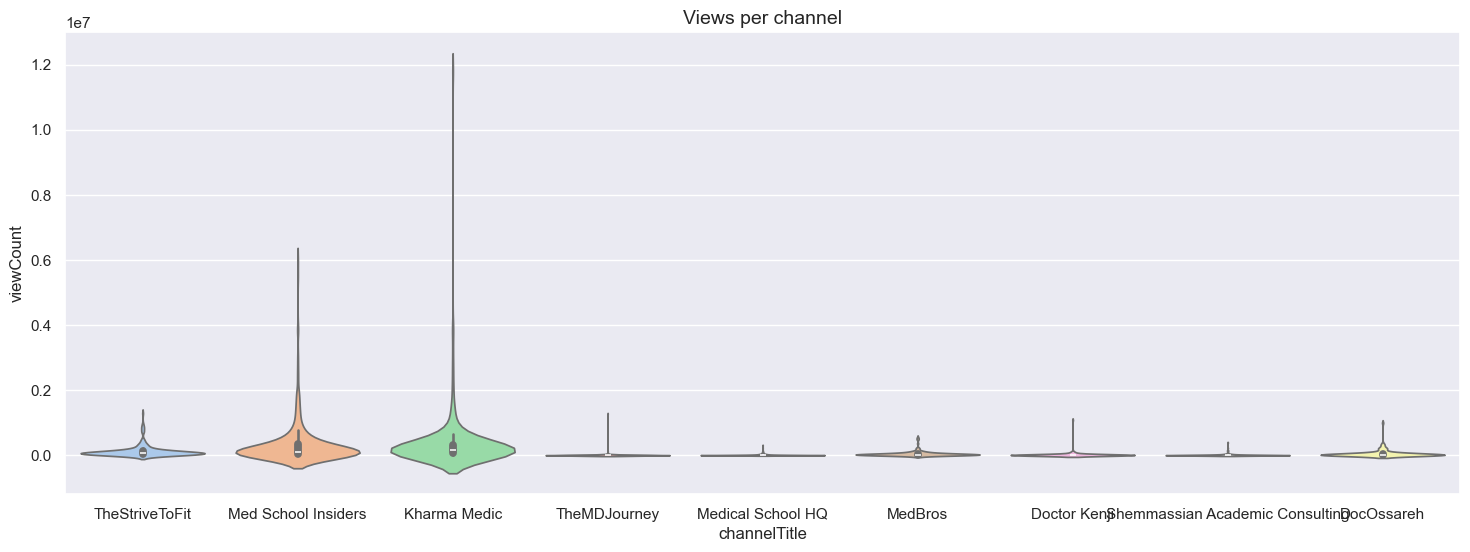

In [250]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(x='channelTitle', y='viewCount', data=video_df, palette = 'pastel')
plt.title('Views per channel', fontsize = 14)
plt.show()

### Correlation between number of likes and number of views

Let's investigate the correlation between the number of likes and the number of views per video across multiple channels to see if there is a postitive correlation and if videos that have a lot of views are more likely to have a lot of likes. 

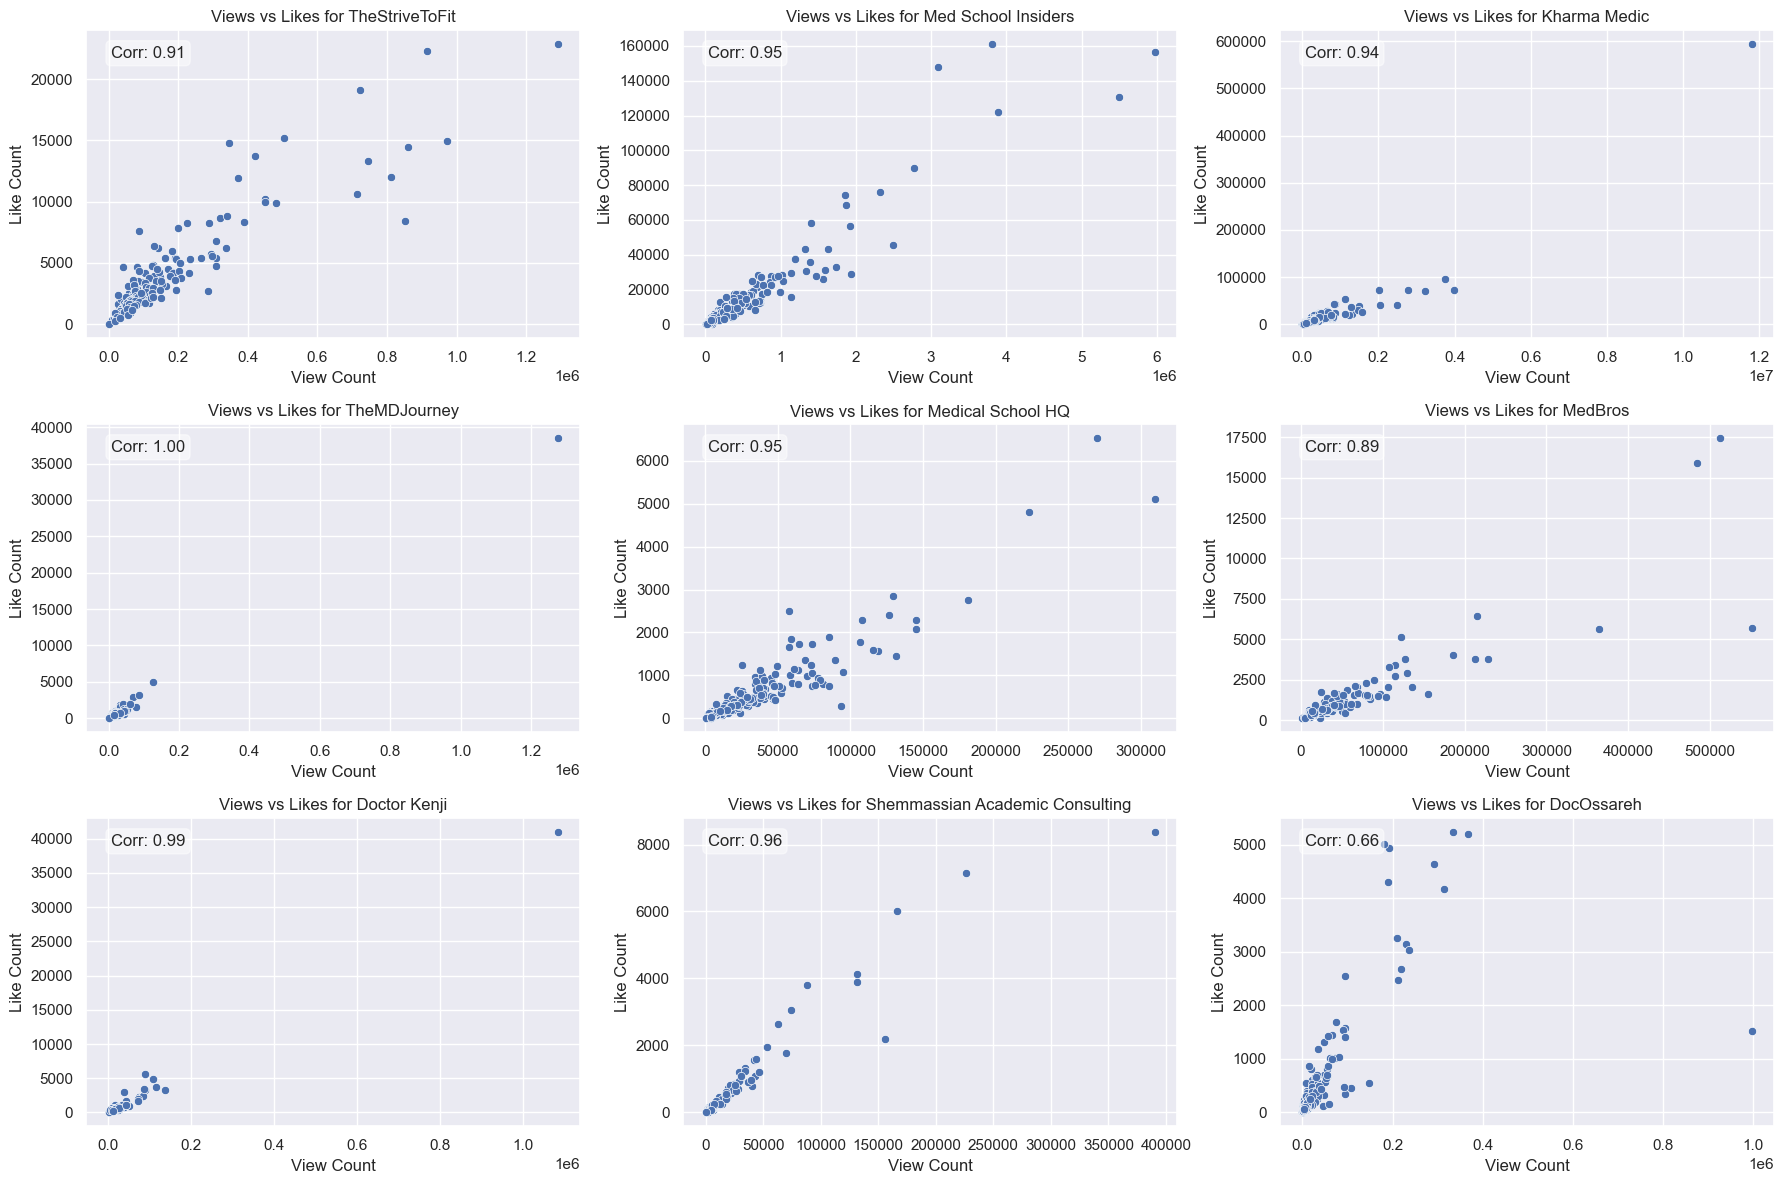

In [251]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the overall figure size
axes = axes.flatten()  # Flatten the array of axes for easy iteration

channel_names = video_df['channelTitle'].unique()

for i, channel in enumerate(channel_names):
    channel_data = video_df[video_df['channelTitle'] == channel]

    correlation = channel_data['viewCount'].corr(channel_data['likeCount'])
    
    sns.scatterplot(data=channel_data, x='viewCount', y='likeCount', ax=axes[i])
    axes[i].set_title(f'Views vs Likes for {channel}') 
    axes[i].set_xlabel('View Count') 
    axes[i].set_ylabel('Like Count') 

    axes[i].text(0.05, 0.95, f'Corr: {correlation:.2f}', transform=axes[i].transAxes, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()

plt.show()

### Correlation between number of comments and number of views

Similiarly, we can look at the correlation between the number of likes and the number of views to see if there is a positive correlation.

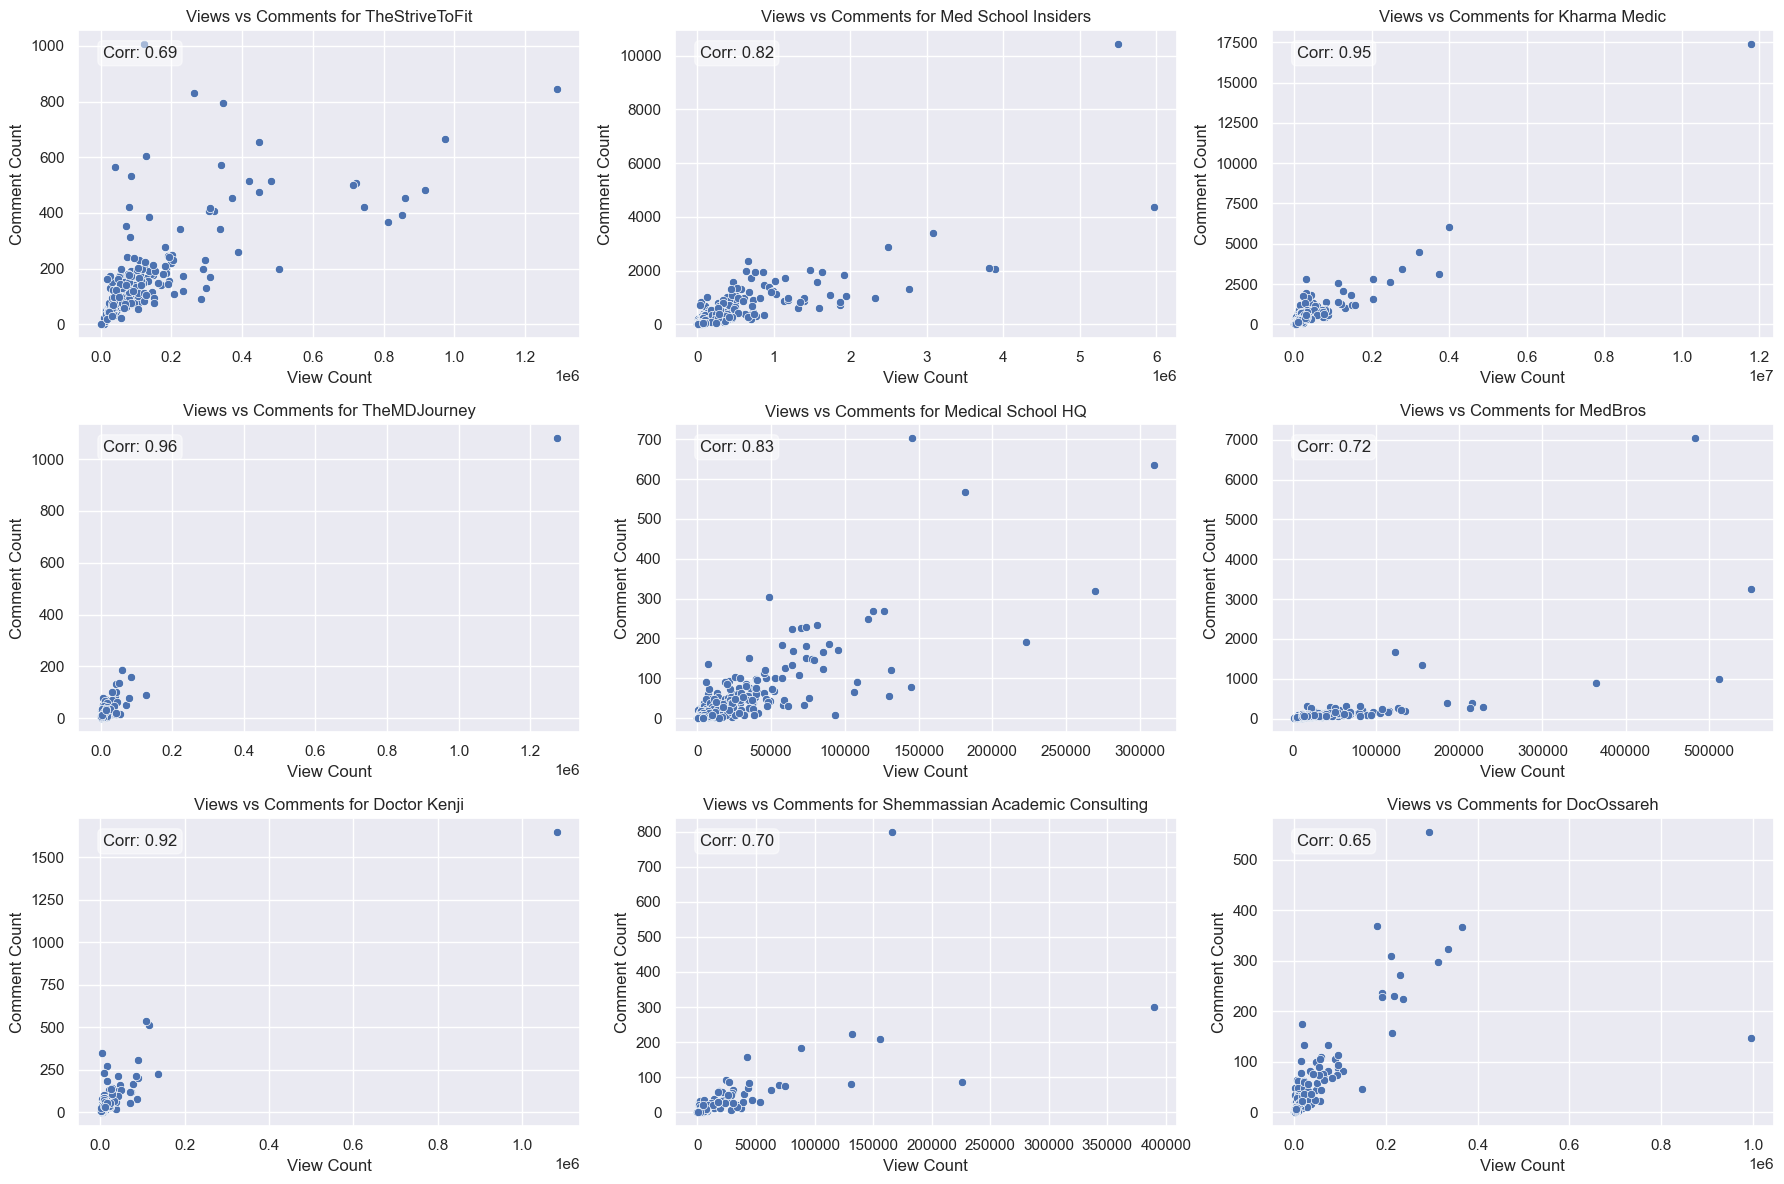

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the overall figure size
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, channel in enumerate(channel_names):
    channel_data = video_df[video_df['channelTitle'] == channel]

    correlation = channel_data['viewCount'].corr(channel_data['commentCount'])
    
    sns.scatterplot(data=channel_data, x='viewCount', y='commentCount', ax=axes[i])
    axes[i].set_title(f'Views vs Comments for {channel}')  
    axes[i].set_xlabel('View Count') 
    axes[i].set_ylabel('Comment Count')  

    axes[i].text(0.05, 0.95, f'Corr: {correlation:.2f}', transform=axes[i].transAxes, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

It seems like there is a positive correlation for both of these relationships. This makes sense because the more views a video has, the more potential users that are able to like the video or comment on it. So even if the percentage of viewers that engage with the video stays the same, a larger number of viewers will result in more engagement.

Now we will take a look at the correlation if we look at the comment ratio and like ratio instead of the absolute number, this time looking across all channels instead of at each channel individually

### Correlation between Video Duration and Views, Likes, and Comments

Looking across all channels, let's graph the correlation between the length of a video (in seconds) and other variables. Before we plot correlations, however, let's first plot the distribution of video duration to see what how the length of videos vary. Note we limit the duration to 10,000 so that we avoid allowing really long videos (potentially streaming videos) to skew how we view the data.

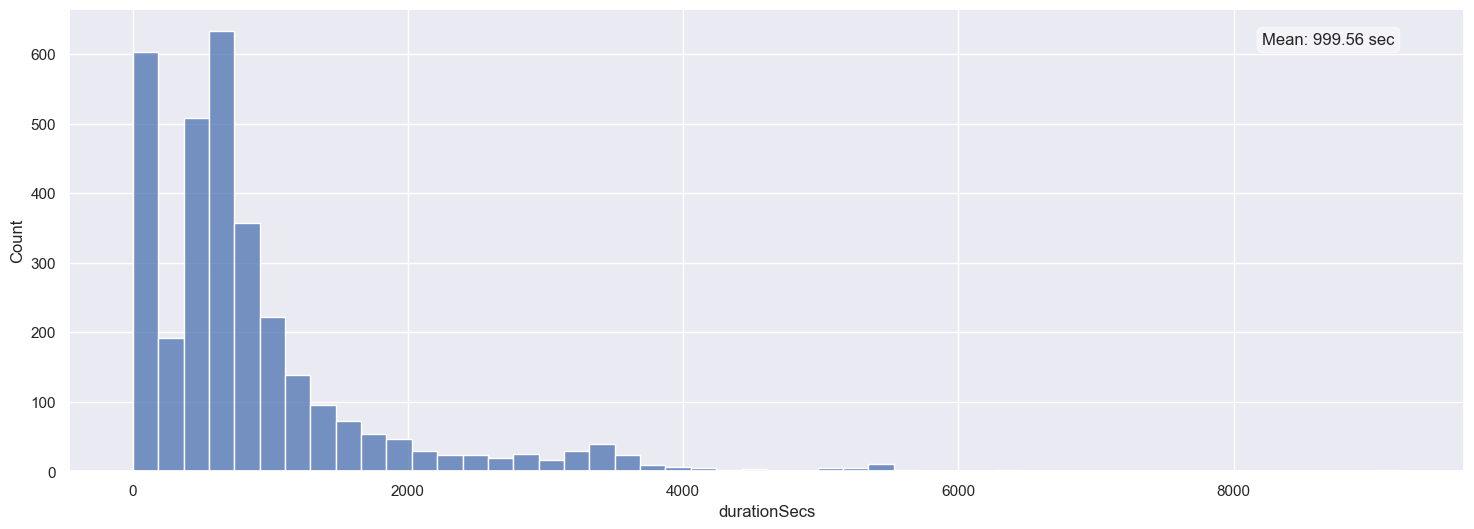

In [253]:
# Plot distribution of video lengths
sns.histplot(data=video_df[video_df['durationSecs'] < 10000], x="durationSecs", bins=50)

mean_duration = video_df['durationSecs'].mean()

plt.text(0.95, 0.95, f'Mean: {mean_duration:.2f} sec', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

Now we can graph the correlations between duration and our variable of interest

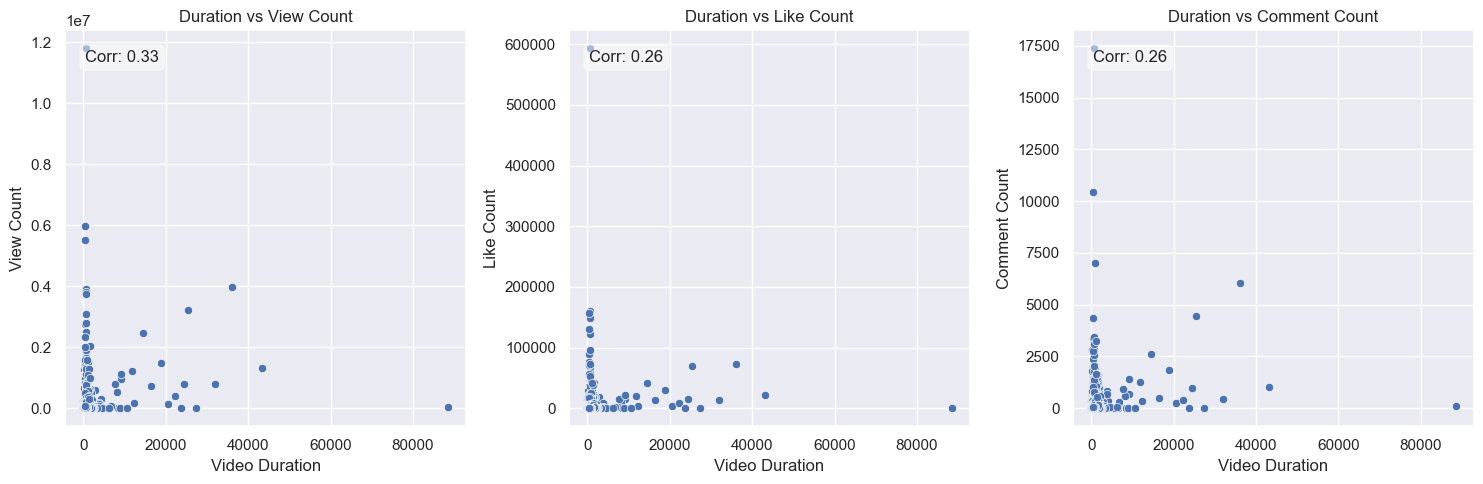

In [254]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

variables = ['viewCount', 'likeCount', 'commentCount']

for i, variable in enumerate(variables):
    sns.scatterplot(data=video_df, x='durationSecs', y=variable, ax=axes[i])
    
    formatted_variable = variable[:1].upper() + variable[1:variable.index('C')] + ' ' + variable[variable.index('C'):].capitalize()
    
    axes[i].set_title(f'Duration vs {formatted_variable}')
    axes[i].set_xlabel('Video Duration')
    axes[i].set_ylabel(formatted_variable)

    correlation = channel_data['durationSecs'].corr(channel_data[variable])

    axes[i].text(0.05, 0.95, f'Corr: {correlation:.2f}', transform=axes[i].transAxes, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

We can see that shorter videos tend to get more views. This is intuitive since users are more likely to click on a video that they see is very short and won't take up much of their time to watch

### Correlation between Title Length and Views, Likes, and Comments

As we did for video duration, let's also explore the relationship between title length and different video metrics

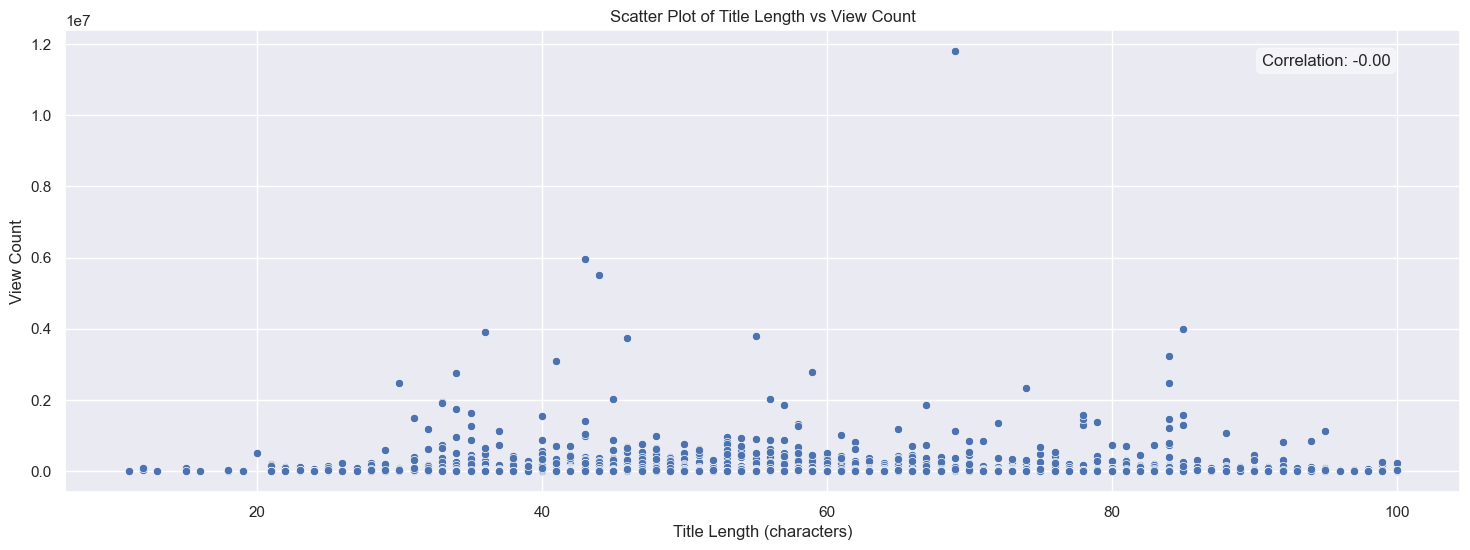

In [255]:
sns.scatterplot(data=video_df, x="titleLength", y="viewCount")
plt.title("Scatter Plot of Title Length vs View Count")  # Adding a title
plt.xlabel("Title Length (characters)")  # Label for the x-axis
plt.ylabel("View Count")  # Label for the y-axis

corr = video_df['titleLength'].corr(video_df['viewCount'])

plt.text(0.95, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

Thus, we can see that there seems to not be any correlation between the length of a video title and its number of views

### Correlation between number of tags and number of views

Finally, let's look at one final correlation: number of tags against number of views

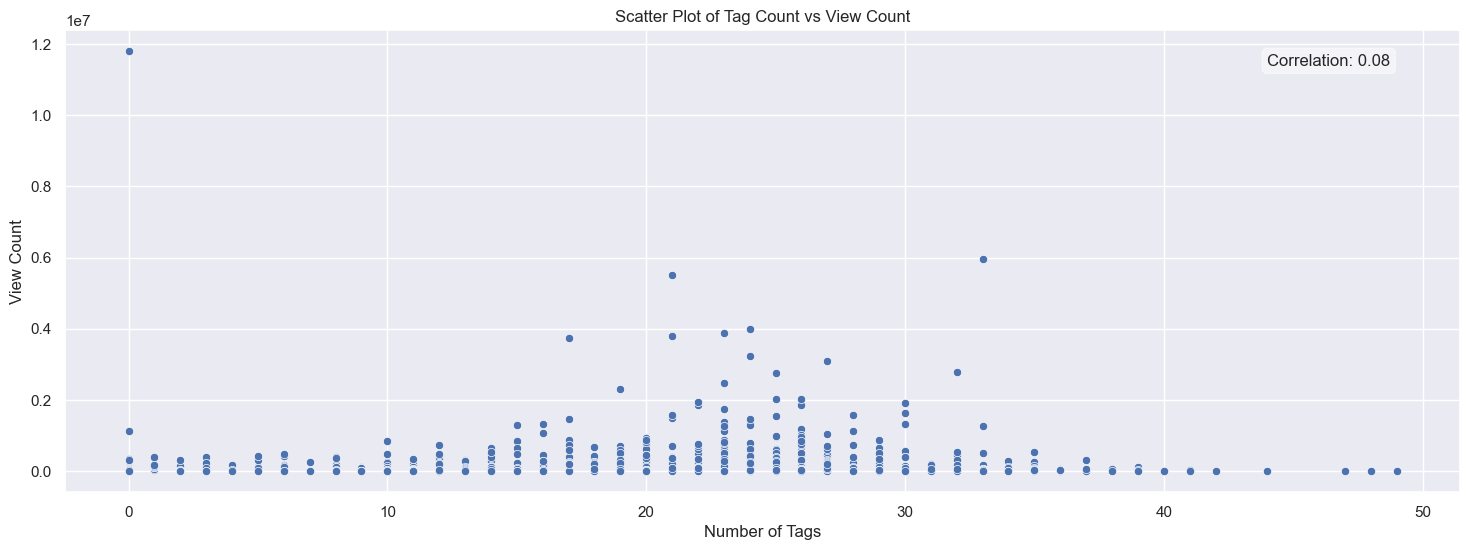

In [256]:
sns.scatterplot(data=video_df, x="tagsCount", y="viewCount")
plt.title("Scatter Plot of Tag Count vs View Count")
plt.xlabel("Number of Tags") 
plt.ylabel("View Count")  

corr = video_df['tagsCount'].corr(video_df['viewCount'])

plt.text(0.95, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

As we saw with title length, there is a weak correlation between the number of tags and the number of views also.

### Wordcloud for words in title

Another detail of interest is to see what most of these medical school information channels are making videos about. We can do this by looking at the terms that most frequently appear in their video titles. We will do this by creating a wordcloud for the most common words, first, removing stopwords like "I" and "you" that don't add much meaning.

In [257]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

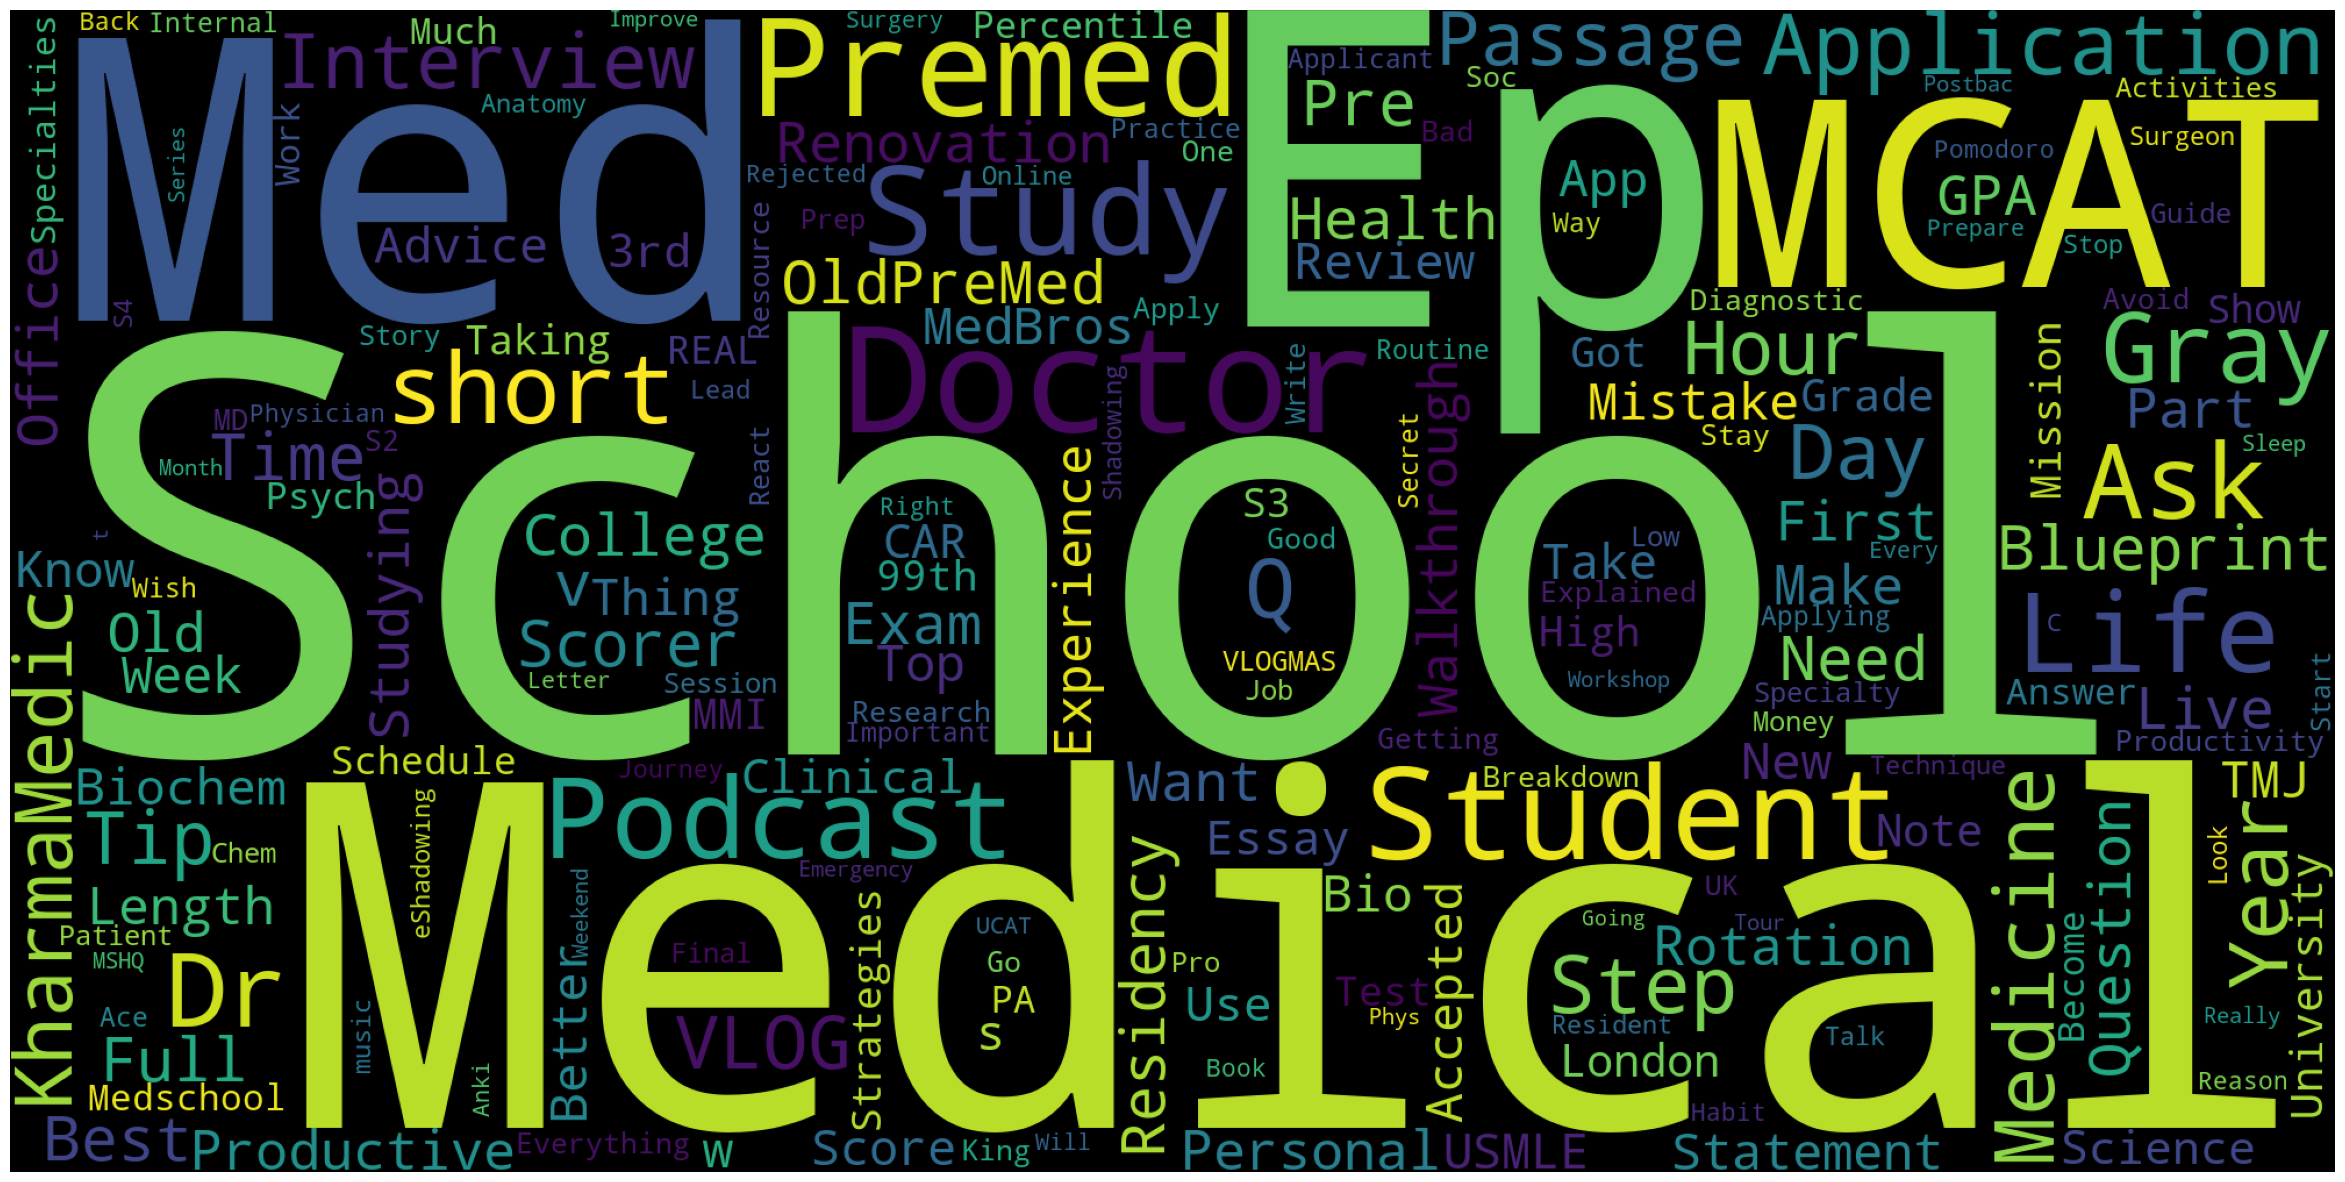

In [258]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis('off');

wordcloud = WordCloud(width=2000, height=1000, random_state = 1, background_color = 'black',
                      colormap='viridis', collocations=False).generate(all_words_str)

plot_cloud(wordcloud)

We see that some of the most common words are School, Medical, MCAT, Med, Premed, Study, and Doctor. This makes sense since these terms are consistent with the theme of medical school.

### Upload Schedule

Let's see which days of the week have the most videos uploaded

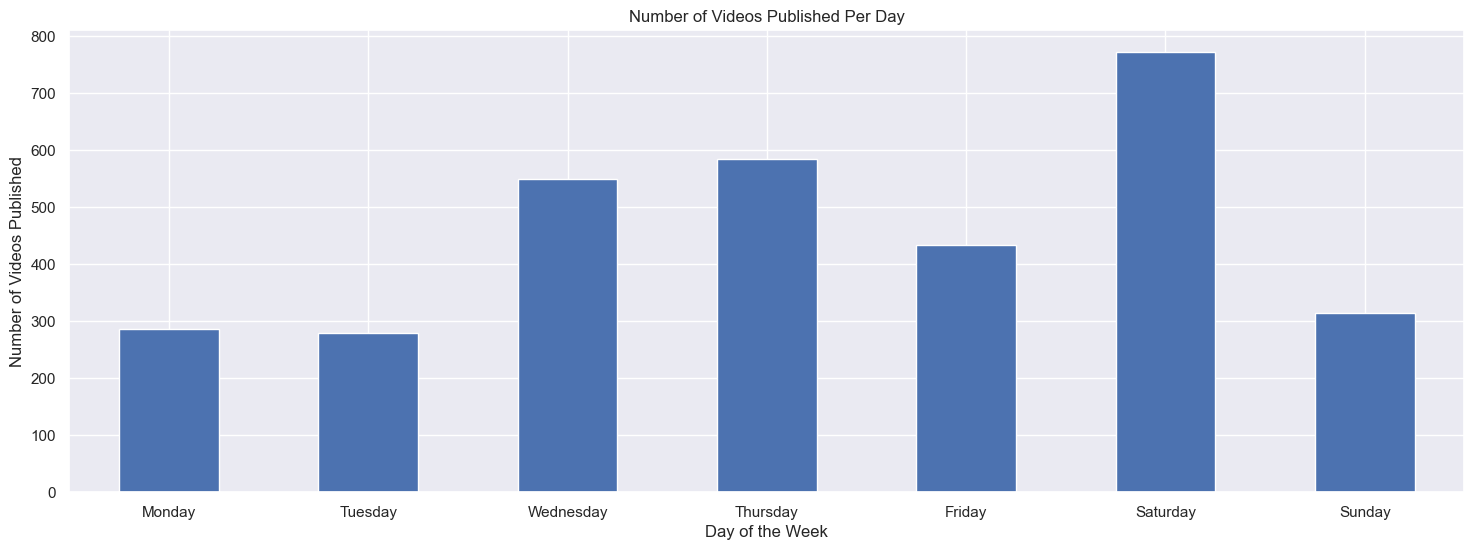

In [259]:
# Assuming video_df is defined and has a column 'publishDayName' with days of the week

day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_df = day_df.reindex(weekdays)
day_df = day_df.reset_index()
day_df.columns = ['Day', 'Count']

ax = day_df.plot.bar(x='Day', y='Count', rot=0, legend=False)

ax.set_xlabel("Day of the Week")
ax.set_ylabel("Number of Videos Published")
ax.set_title("Number of Videos Published Per Day")

plt.show()


It seems like Saturday is the most popular day for videos to be published, with Thursday and Wednesday trailing behind. This could be because premed students will likely be busy throughout the week and be most free to watch videos on Saturdays compared to other days, so uploading during that time makes senes.

### Best and Worst Performing Videos

Out of curiosity let's look at the top 5 most viewed videos and what are the top 5 least viewed videos of Med School Insiders, one of the larger channel. We will only look at one channel here because channel size has a large affect on the number of views per video, so it would be unfair to compare views across channels. Also, while simplying looking at the top 5 and bottom 5 viewed videos isn't enough information to make any meaningful conclusions, it may give us a better idea of what sort of topics garner the most interest.

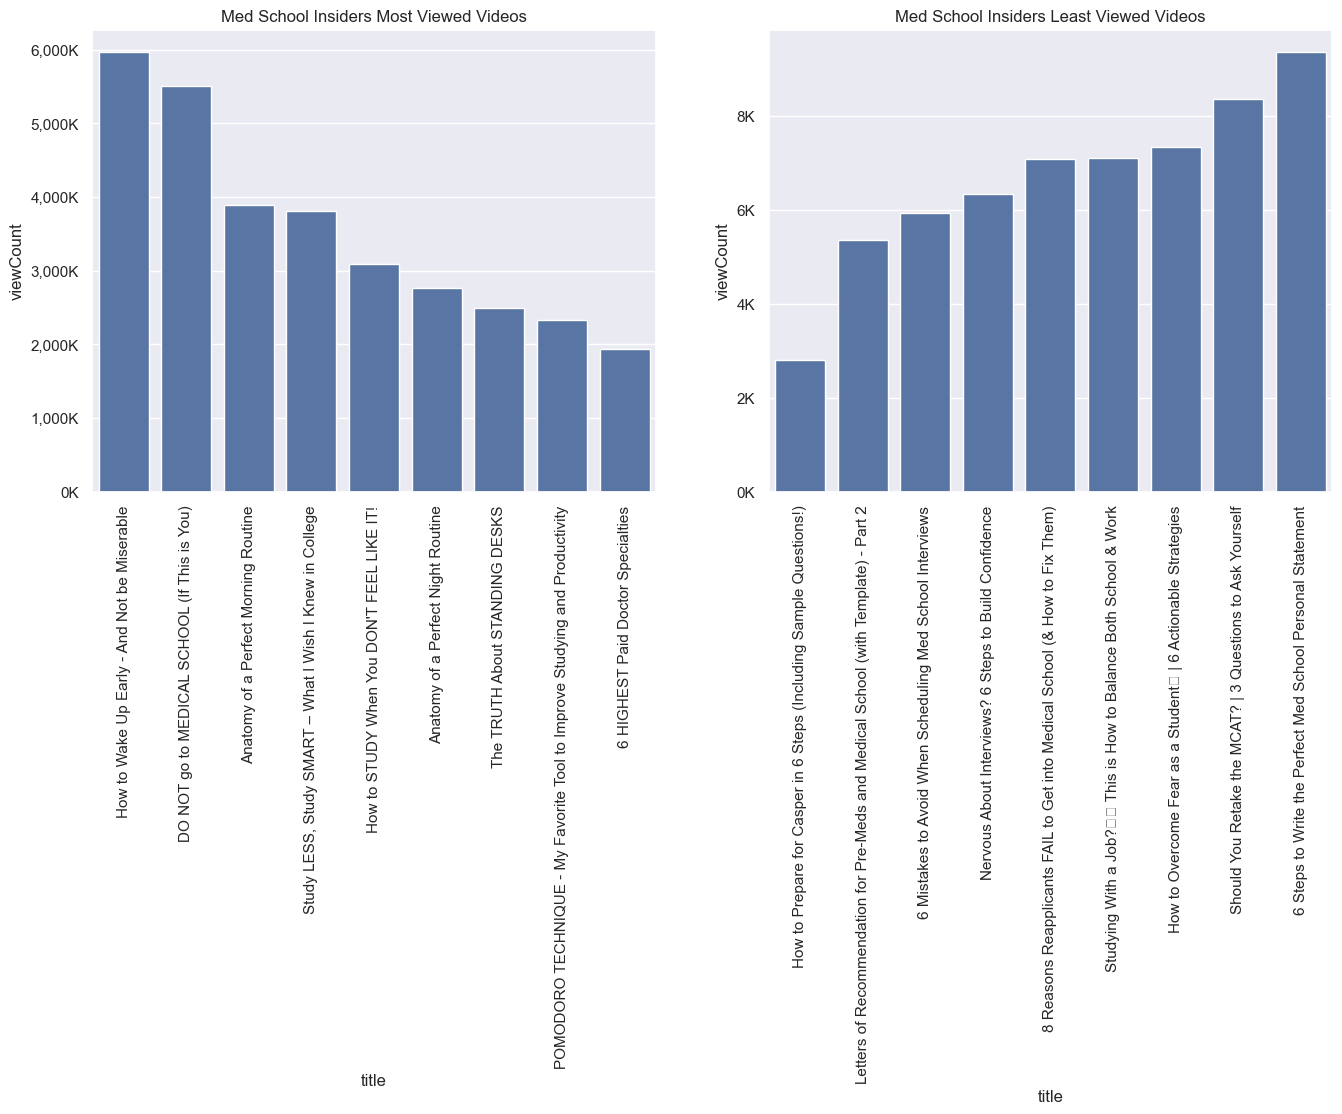

In [260]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

MSI_data = video_df[video_df['channelTitle'] == 'Med School Insiders']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plotting the Most Viewed Videos on the first axis
ax1 = sns.barplot(x='title', y='viewCount', data=MSI_data.sort_values('viewCount', ascending=False).iloc[:9], ax=axes[0])
axes[0].set_title('Med School Insiders Most Viewed Videos')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))

# Plotting the Least Viewed Videos on the second axis
ax2 = sns.barplot(x='title', y='viewCount', data=MSI_data.sort_values('viewCount', ascending=True).iloc[:9], ax=axes[1])
axes[1].set_title('Med School Insiders Least Viewed Videos')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'K'))

plt.tight_layout()

plt.show()

# Conclusions and Ending Notes

In this project, we have explored the video data of 9 popular medical school information channels, creating content for premeds and current medical students. We have revealed some interesting findings for anyone starting a YouTube channel in this space. Here are some key takeaways:

- There is a strong positive correlation between the number of views and the quantity of likes/comments. Although correlation does not imply causation, it appears that focusing on increasing total views could also naturally lead to improvements in other important metrics such as likes and comments.

- There is a weak correlation between title length and view count, so do not worry about spending too much time coming up with a perfect title length.

- Similarly, there is a weak correlation between the number of tags on the video and view counts, so which tags you put on are likely more important than the number of tags you have.

- There is a weak correlation between video duration and view count, so longer videos do not necesarilly attract more viewers. On the other hand, very short videos, often referred to as "shorts", seem to receive many views, indicating that producing such content could be advantageous.

- Saturday seems to be a popular day for uploading new videos, so consider focusing on uploading videos during the weekend as this may be when medical and premed students will have more free time to consume content.

### Project Limitations

It is important to note a few project and data limitations, acknowledging that some of these findings should be taken for a grain of salt. For example:

- The number of videos is quite small (the dataset has only ~3200 videos)

- The subset of medical school information channels analyzed here is very small (9 channels). There are likely many more channels that fit this category on YouTube, and the subset may not be fully representative of all of them.

- Medical school is a very broad topic, and even though all of these channels fit the category of "medical school information", they may focus on different things. For example, some may be more focused on medical school admission exam preparation, while others are more focused on showcasing the types of medical specialties and career options.

- There are many other factors that haven't been taken into the analysis, including the marketing strategy of the creators and many random effects that would affect how successful a video is

### References & Resources used

[1] YouTube API. Available at https://developers.google.com/youtube/v3

[2] YouTube API for Python (project walkthrough YouTube video): https://youtu.be/D56_Cx36oGY

[3] Original GitHub repository associated with above YouTube video: https://github.com/thu-vu92/youtube-api-analysis